In [24]:
import os
os.chdir(os.path.normpath(os.path.join(os.path.abspath(__name__), "..", "..")))


import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
from conf.global_settings import OUTPUT_DIR
from glob import glob

In [109]:
files = sorted(glob(os.path.join('/Users/marlis/Developer/ECCO/ecco_output/TELLUS_GRAC-GRFO_MASCON_CRI_GRID_RL06.1_V3/transformed_products/ECCO_llc270/aggregated/lwe_thickness/netCDF', '*MONTHLY*.nc')))
files

['/Users/marlis/Developer/ECCO/ecco_output/TELLUS_GRAC-GRFO_MASCON_CRI_GRID_RL06.1_V3/transformed_products/ECCO_llc270/aggregated/lwe_thickness/netCDF/TELLUS_GRAC-GRFO_MASCON_CRI_GRID_RL06.1_V3_ECCO_llc270_MONTHLY_lwe_thickness_2002.nc',
 '/Users/marlis/Developer/ECCO/ecco_output/TELLUS_GRAC-GRFO_MASCON_CRI_GRID_RL06.1_V3/transformed_products/ECCO_llc270/aggregated/lwe_thickness/netCDF/TELLUS_GRAC-GRFO_MASCON_CRI_GRID_RL06.1_V3_ECCO_llc270_MONTHLY_lwe_thickness_2003.nc',
 '/Users/marlis/Developer/ECCO/ecco_output/TELLUS_GRAC-GRFO_MASCON_CRI_GRID_RL06.1_V3/transformed_products/ECCO_llc270/aggregated/lwe_thickness/netCDF/TELLUS_GRAC-GRFO_MASCON_CRI_GRID_RL06.1_V3_ECCO_llc270_MONTHLY_lwe_thickness_2004.nc',
 '/Users/marlis/Developer/ECCO/ecco_output/TELLUS_GRAC-GRFO_MASCON_CRI_GRID_RL06.1_V3/transformed_products/ECCO_llc270/aggregated/lwe_thickness/netCDF/TELLUS_GRAC-GRFO_MASCON_CRI_GRID_RL06.1_V3_ECCO_llc270_MONTHLY_lwe_thickness_2005.nc',
 '/Users/marlis/Developer/ECCO/ecco_output/TELLU

In [110]:
opened_files = [xr.open_dataset(file) for file in files]
ds = xr.concat(opened_files, dim='time')

/var/folders/h4/mm_mpry950vccmj47mxqdct40000gq/T/ipykernel_46398/1935298321.py:2: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(ds[var].values, axis=(1,2,3))
/Users/marlis/opt/anaconda3/envs/ecco_pipeline/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


Text(0, 0.5, 'cm')

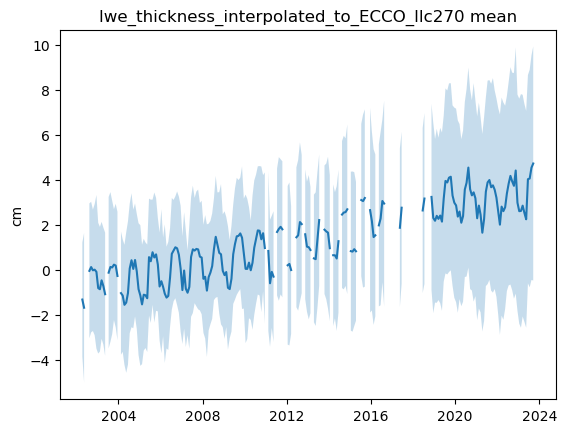

In [123]:
var = 'lwe_thickness_interpolated_to_ECCO_llc270'
mean = np.nanmean(ds[var].values, axis=(1,2,3))
std = np.nanstd(ds[var].values, axis=(1,2,3))
plt.fill_between(ds['time'], mean - std, mean + std, alpha=.25)
plt.plot(ds['time'].values, mean)
plt.title(f'{var} mean')
plt.ylabel(ds[var].attrs['units'])

/var/folders/h4/mm_mpry950vccmj47mxqdct40000gq/T/ipykernel_46398/3477748700.py:1: RuntimeWarning: All-NaN slice encountered
  plt.plot(ds['time'].values, np.nanmin(ds[var].values, axis=(1,2,3)))


Text(0, 0.5, 'cm')

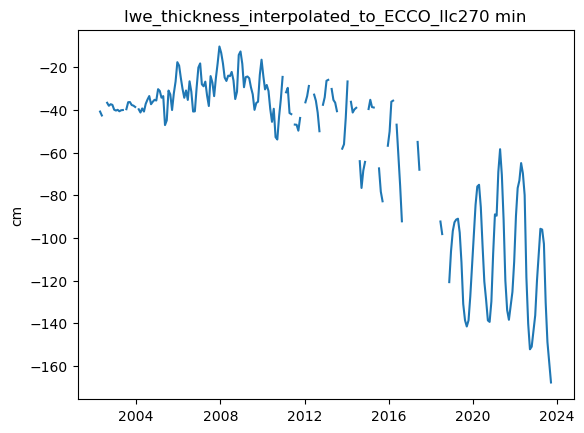

In [124]:
plt.plot(ds['time'].values, np.nanmin(ds[var].values, axis=(1,2,3)))
plt.title(f'{var} min')
plt.ylabel(ds[var].attrs['units'])

/var/folders/h4/mm_mpry950vccmj47mxqdct40000gq/T/ipykernel_46398/4222394072.py:1: RuntimeWarning: All-NaN slice encountered
  plt.plot(ds['time'].values, np.nanmax(ds[var].values, axis=(1,2,3)))


Text(0, 0.5, 'cm')

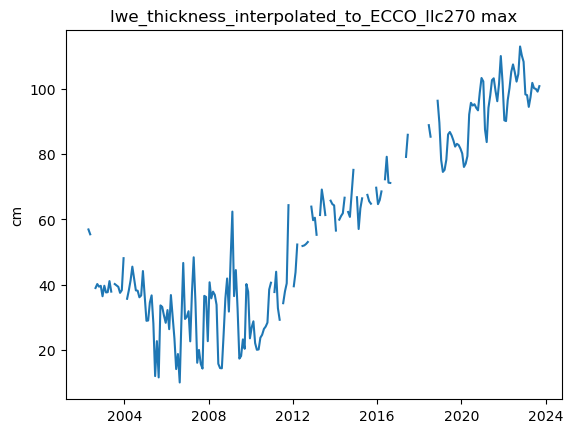

In [125]:
plt.plot(ds['time'].values, np.nanmax(ds[var].values, axis=(1,2,3)))
plt.title(f'{var} max')
plt.ylabel(ds[var].attrs['units'])